In [49]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('NBADataPlayoffResults.csv')

In [51]:
df.head()

,TEAM,PACE,PACEvsLA,AST,TO,ORR,DRR,REBR,EFF FG%,EFFFGvsLA,TS%,TSvsLA,OFF EFF,OFFEFFvsLA,DEF EFF,DEFEFFvsLA,NET EFF,Result,Season
0,Brooklyn,101.8,0.38,19.5,12.2,21.4,77.6,50.8,57.5,3.7,61.0,3.82,116.3,6.4,110.6,0.7,5.7,2,2021
1,LA Clippers,99.1,-2.32,18.4,12.2,22.7,79.5,51.7,56.4,2.6,59.9,2.72,115.2,5.3,108.7,-1.2,6.5,3,2021
2,Utah,100.8,-0.62,17.5,12.7,24.5,78.7,53.1,56.3,2.5,59.7,2.52,115.1,5.2,105.7,-4.2,9.4,2,2021
3,Phoenix,99.3,-2.12,19.8,11.5,20.8,78.7,50.1,56.4,2.6,59.7,2.52,114.9,5.0,108.8,-1.1,6.1,4,2021
4,Portland,100.8,-0.62,16.0,9.9,23.0,76.3,49.5,54.0,0.2,57.7,0.52,114.9,5.0,113.4,3.5,1.5,1,2021


In [52]:
X = df[df['Result'] != 0].drop(columns = ['PACE', 'EFF FG%', 'TS%','OFF EFF','DEF EFF', 'TEAM', 'Season', 'EFFFGvsLA'])

In [53]:
y = X['Result']

In [54]:
X.head()

,PACEvsLA,AST,TO,ORR,DRR,REBR,TSvsLA,OFFEFFvsLA,DEFEFFvsLA,NET EFF,Result
0,0.38,19.5,12.2,21.4,77.6,50.8,3.82,6.4,0.7,5.7,2
1,-2.32,18.4,12.2,22.7,79.5,51.7,2.72,5.3,-1.2,6.5,3
2,-0.62,17.5,12.7,24.5,78.7,53.1,2.52,5.2,-4.2,9.4,2
3,-2.12,19.8,11.5,20.8,78.7,50.1,2.52,5.0,-1.1,6.1,4
4,-0.62,16.0,9.9,23.0,76.3,49.5,0.52,5.0,3.5,1.5,1


In [55]:
X = X.drop(columns = ['Result'])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state = 42)

In [60]:
scaled_X_train = scaler.fit_transform(X_train)

In [61]:
scaled_X_test = scaler.transform(X_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'n_neighbors': list(range(1,20)), 'weights': ['uniform', 'distance']}

In [65]:
nbaknn = KNeighborsClassifier()

In [66]:
grid = GridSearchCV(nbaknn, param_grid)

In [67]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [68]:
grid.best_params_

{'n_neighbors': 19, 'weights': 'uniform'}

In [69]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [70]:
predictions = grid.predict(scaled_X_test)

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        17
           2       0.57      0.67      0.62         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.72        29
   macro avg       0.27      0.33      0.30        29
weighted avg       0.57      0.72      0.64        29



C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


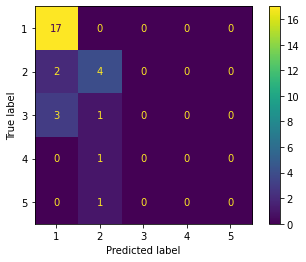

In [72]:
plot_confusion_matrix(grid, scaled_X_test, y_test)